In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split

In [2]:
titanic_train = pd.read_csv('C:/Users/filip/ML/static/Titanick/train.csv')


In [3]:
X = titanic_train.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_train.Survived

In [4]:
X = pd.get_dummies(X) # разбиваем колонки на несколько
X = X.fillna({'Age': X.Age.median()}) # заполняем пропуски

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)


In [6]:
clf = tree.DecisionTreeClassifier(criterion='entropy',
                                  max_depth=3,
                                  min_samples_split=100,
                                  min_samples_leaf=10)

clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=10,
                       min_samples_split=100)

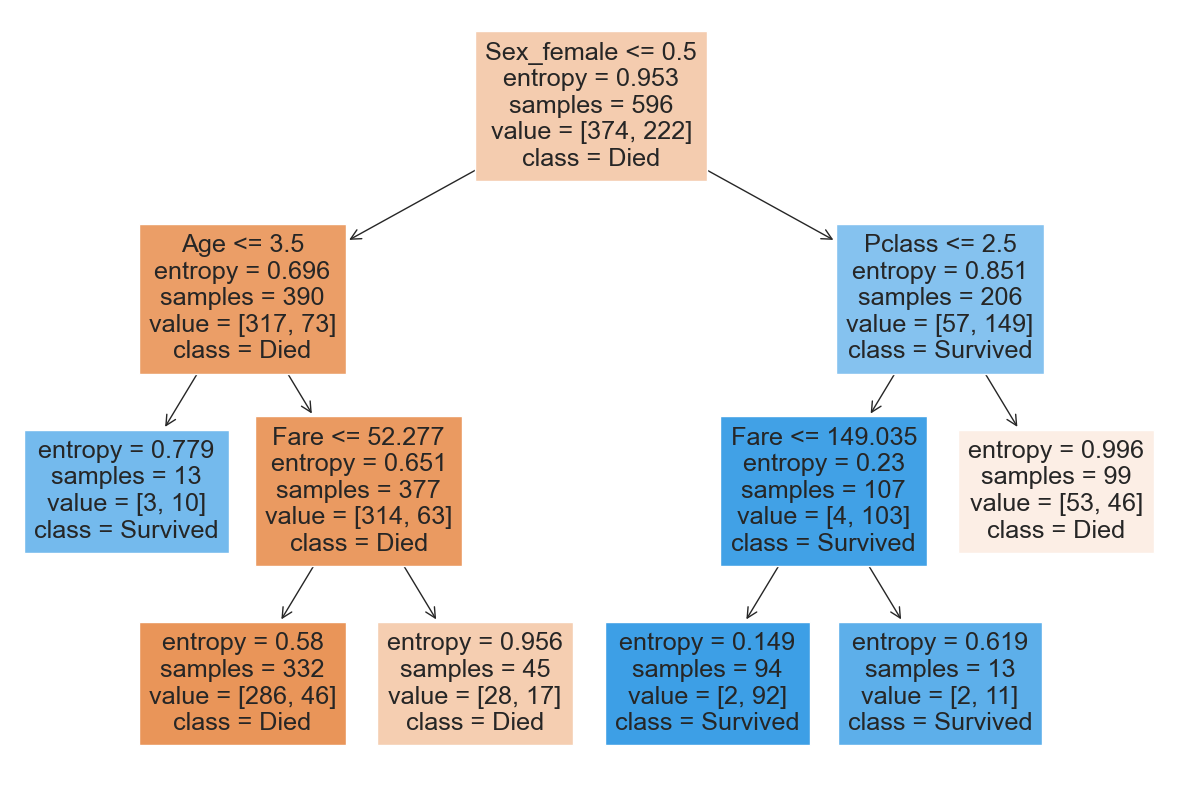

In [11]:
plt.figure(figsize=(15, 10))
tree.plot_tree(clf, feature_names=list(X),
               class_names=['Died', 'Survived'],
               filled=True);

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [6]:
clf_rf = RandomForestClassifier()

In [7]:
parametrs = {'n_estimators': [10,20,30], 'max_depth': [2,5,7,10]}

In [8]:
grid_search_cv_clf = GridSearchCV(clf_rf, parametrs, cv=5)
grid_search_cv_clf.fit(X_train, y_train)
grid_search_cv_clf.best_params_

{'max_depth': 7, 'n_estimators': 10}

In [23]:
grid_search_cv_clf.best_params_

{'max_depth': 10, 'n_estimators': 20}

In [9]:
best_clf = grid_search_cv_clf.best_estimator_
best_clf.score(X_test, y_test)

0.7966101694915254

In [10]:
feature_importance = best_clf.feature_importances_

In [11]:
feature_importances_df = pd.DataFrame({'features':list(X_train.columns),
                                       'feature_importances':  best_clf.feature_importances_})\
                        .sort_values(by='feature_importances')

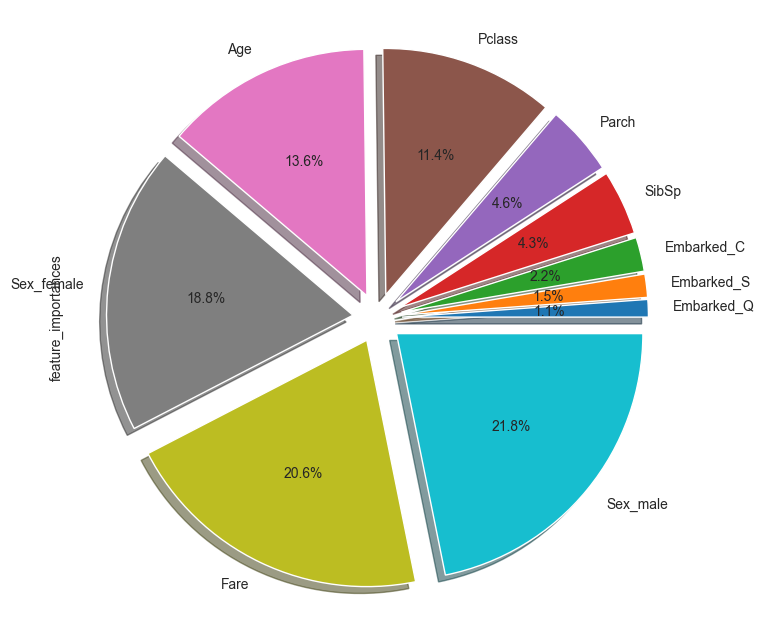

In [13]:
feature_importances_df.plot.pie(
                        explode=[0.1]*len(X_train.columns),
                        labels = feature_importances_df.features,
                        y = 'feature_importances',
                        autopct='%1.1f%%',
                        shadow=True,
                        legend=False,
                        figsize=(8, 8));

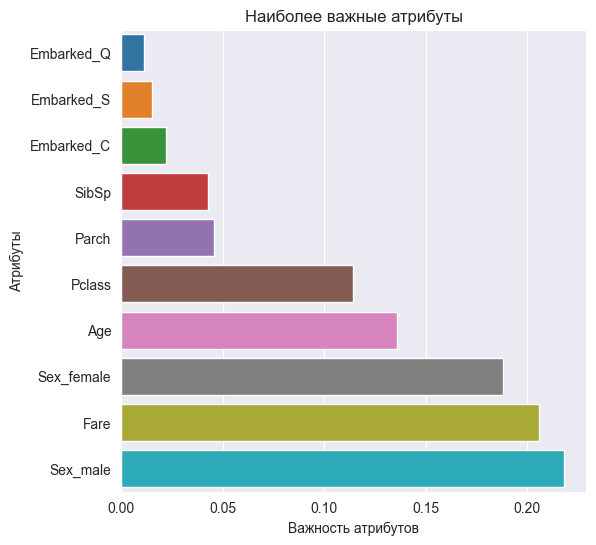

In [15]:
f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(y=feature_importances_df.features, x=feature_importances_df.feature_importances)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.show()

In [16]:
data = pd.read_csv('https://raw.githubusercontent.com/sanyathisside/Predicting-Heart-Disease-using-Machine-Learning/master/heart-disease.csv')

In [19]:
data.head(24)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [24]:
np.random.seed(0)
X = data.drop(['target'], axis=1)
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)
rf = RandomForestClassifier(10, max_depth=5)

In [25]:
rf.fit(X, y)

RandomForestClassifier(max_depth=5, n_estimators=10)

<Axes: >

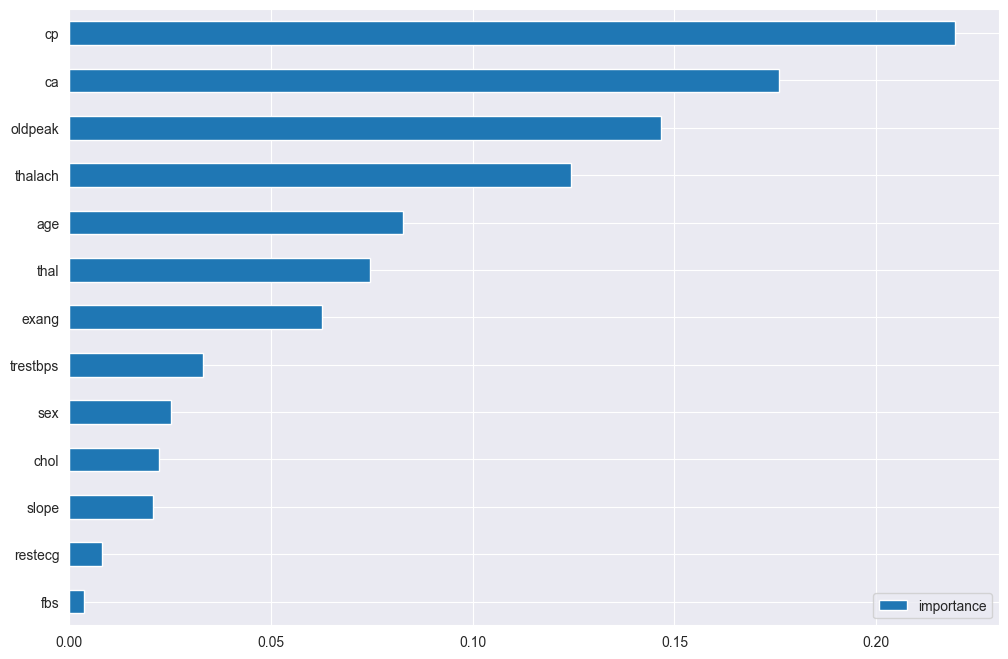

In [26]:
imp = pd.DataFrame(rf.feature_importances_, index=X_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))